# Heart Disease Prediction 🩺
This dataset contains information regarding patients that have heart problems, and this dataset is used to predict whether a person has disease or not.

## Basic Objective 🎯
The basic objective of this notebook is: 
- Explore Dataset 
- Clean Dataset and performing Label Encoding for Non-Numerical Variables
- Find numerical analysis of the dataset
- Performing Feature Engineering
- Splitting the Dataset into Training and Testing Datasets
- Build Machine Learning Models to predict heart disease
- Make Modal Comparison between different models to find the best model

### Machine Learning Models 👩‍💻
We will be using five machine learning models in this notebook:
- K-Nearest Neighbour (KNN)
- Random Forest
- Decision Tree
- Logistic Regression
- Gaussian NB

### Dataset Description 📋
In this dataset, we have:
- 9 categorical variables
- 5 continuous variables.



In [2]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

### Functions 📌
These are the functions that are used throughout the notebook

In [3]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder


def dataset_information(df):
    print('# -------------------------\n# Basic Dataset Information\n# -------------------------')
    print("Shape of the dataset: ", df.shape)
    print('Number of rows: ', df.shape[0])
    print('Number of columns: ', df.shape[1])

    print('Number of Categorical Columns: ', df.select_dtypes(include=['object']).shape[1])
    print('Number of Numerical Columns: ', df.select_dtypes(include=['int64', 'float64']).shape[1])
    print('Missing values: ', df.isnull().sum().sum())

    # ------------------------
    # Unique Values In Dataset
    # ------------------------
    print('')
    print('# ------------------------\n# Unique Values In Dataset\n# ------------------------')
    print(df.nunique())


def replace_missing_values(df):
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)

    
def label_encoding(df, label_column):
    print('----')
    print('Label Column: ', label_column)
    print(df[label_column].value_counts())
    print('')
    
    # Label Encoding
    le = LabelEncoder()
    df[label_column] = le.fit_transform(df[label_column])
    
    print(df[label_column].value_counts())
    print('')


categorical = []
def categorical_column_finder(df, print_data=True):
    if print_data:
        print('')
        print('Categorical Columns')
        print(df.select_dtypes(include=['object']).columns)
        print('')
        print('Non-Numeric Categorical Columns')
        print(df.select_dtypes(include=['object']).columns)
        print('')
    
    # emptying array
    categorical = []
    
    # adding data in array
    for col in df.select_dtypes(include=['object']).columns:
        categorical.append(col)
        
    return categorical


def label_encoding_of_categorical_columns(df, print_data = False):
    print('')
    data = categorical_column_finder(df, print_data)
    for i in data:
        label_encoding(df, i)


## Reading Datasets 🕵️‍♀️
Here we will load the dataset and explore the contents present within it.

Variables are assigned so any heart disease prediction model can be used.

In [4]:
# Reading Dataset

# Dataset Number 1 used for Training the Model
df = pd.read_csv("heart-1.csv")
df_v2 = pd.read_csv("heart-1.csv")

# Dataset Number 2 used for Testing the Model
df_v3 = pd.read_csv("heart.csv")
df_v3 = df_v3.drop('target', axis=1) # Heart disease
df_v3 = df_v3.drop('ca', axis=1)
df_v3 = df_v3.drop('thal', axis=1)

# Assigning Variables for Reuseability
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'] 

age = df[columns[0]]
gender = df[columns[1]]
chest_pain_type = df[columns[2]]

resting_blood_pressure = df[columns[3]]
cholestoral = df[columns[4]]
fasting_blood_sugar = df[columns[5]]

resting_electrocardiographic_results = df[columns[6]]
max_heart_rate_achieved = df[columns[7]]
exercise_induced_angina = df[columns[8]]

oldpeak = df[columns[9]]
slope_of_the_peak_exercise_st_segment = df[columns[10]]
heart_disease = df[columns[11]]

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Dataset Information 📕
This section will display basic information on the dataset. 

In [6]:
# A function that will explain basic info on dataset
dataset_information(df)

# -------------------------
# Basic Dataset Information
# -------------------------
Shape of the dataset:  (918, 12)
Number of rows:  918
Number of columns:  12
Number of Categorical Columns:  5
Number of Numerical Columns:  7
Missing values:  0

# ------------------------
# Unique Values In Dataset
# ------------------------
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [7]:
# This will show data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Shows the columns that has Categorical Data
categorical_column_finder(df)

df.head()


Categorical Columns
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Non-Numeric Categorical Columns
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Label Encoding for Categorical Variables 📝
Here we will be using label encoding for categorical variables to convert them into numerical values.

An Example is, Gender has M or F as categorical variables, with the label encoder function, they will be turned into 0s and 1s for statistical calculation.

In [9]:
# Convert Non-numeric Data to Numeric Values
label_encoding_of_categorical_columns(df)


----
Label Column:  Sex
M    725
F    193
Name: Sex, dtype: int64

1    725
0    193
Name: Sex, dtype: int64

----
Label Column:  ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

----
Label Column:  RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

1    552
0    188
2    178
Name: RestingECG, dtype: int64

----
Label Column:  ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64

0    547
1    371
Name: ExerciseAngina, dtype: int64

----
Label Column:  ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

1    460
2    395
0     63
Name: ST_Slope, dtype: int64



In [10]:
# Verifying for changes
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Numerical Analysis 🔢
Now since we have examined the basic dataset, we will now look at the numerical analysis to study our dataset.

In [11]:
# Shows basic statistics of the dataset non-categorical columns
df_v2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
# Shows correlation of non-categorical columns in the dataset
df_v2.corr()  

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [13]:
# Categorical Analysis using Heart Disease
df.groupby('HeartDisease').size()  # target variable

HeartDisease
0    410
1    508
dtype: int64

In [14]:
# Numerical Distribution 
df.groupby(heart_disease).mean().T

HeartDisease,0,1
Age,50.551220,55.899606
Sex,0.651220,0.901575
ChestPainType,1.192683,0.448819
RestingBP,130.180488,134.185039
Cholesterol,227.121951,175.940945
FastingBS,0.107317,0.334646
RestingECG,0.948780,1.021654
MaxHR,148.151220,127.655512
ExerciseAngina,0.134146,0.622047
Oldpeak,0.408049,1.274213


## Visulization of Dataset 📊
Now since we have obtained the numerical analysis, we will now look at the visulization of the numerical variables.

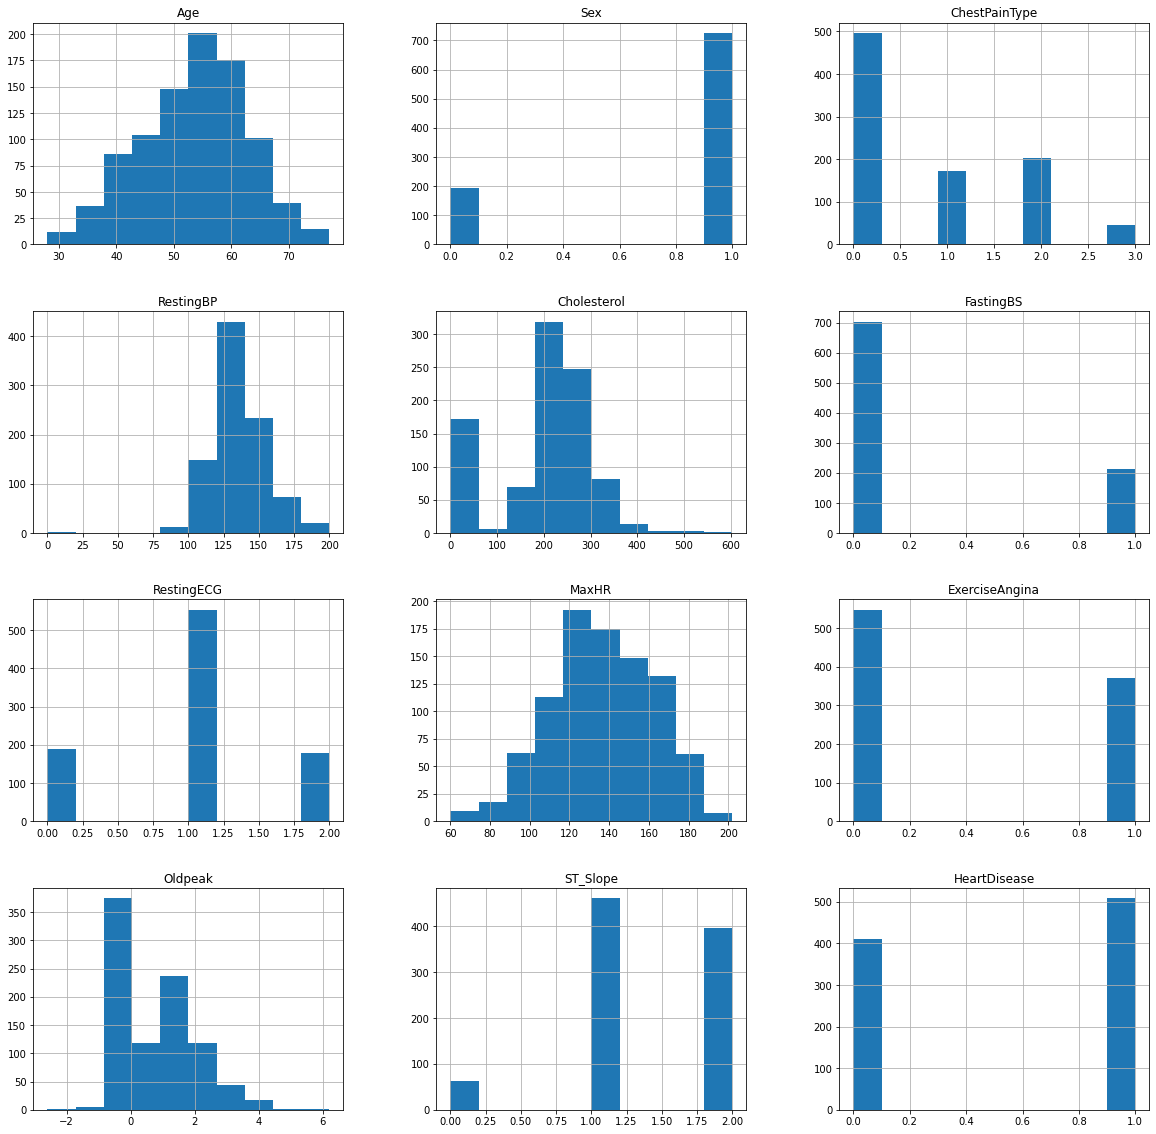

In [15]:
# Histogram of all columns
df.hist(figsize=(20,20))
plt.show()

# 0 = Blue = no heart disease
# 1 = Orange = heart disease


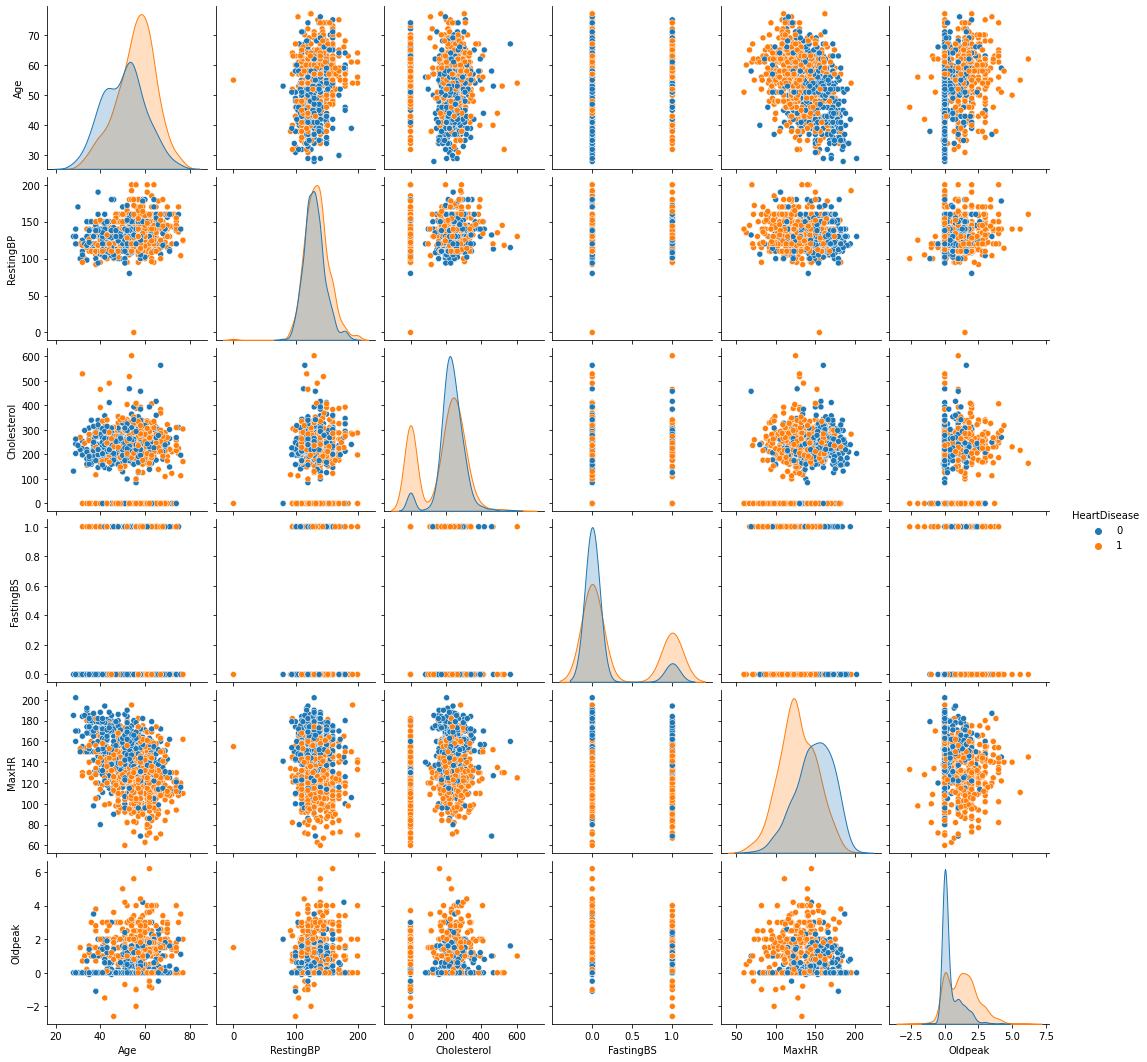

In [16]:
# Pair Plot for categorical variables with a legend to show which variables are categorical
sns.pairplot(df_v2, hue='HeartDisease')
print('# 0 = Blue = no heart disease')
print('# 1 = Orange = heart disease')

<AxesSubplot:>

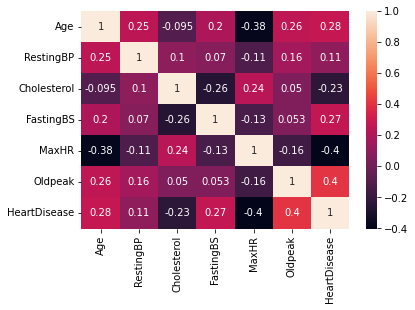

In [17]:
# Heatmap for correlation between variables
sns.heatmap(df_v2.corr(), annot=True)

## Data Preprocessing 📈

In [18]:
# Data Preprocessing  
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% as the training set 
# 20% as test samples

# Training Samples
print(len(X_train))
print(len(y_train))

print()
# Testing Samples
print(len(X_test))
print(len(y_test))

734
734

184
184


### K-Nearest Neighbour (KNN) 📍
The k-nearest neighbors (KNN) is a simple algorithm which is commonly used to supervise machine learning algorithm which can be used to solve both classification and regression problems. We will be using the KNN algorithm to predict the heart disease of a person based on the features and then compare the results with the other algorithms.

In [19]:
import warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(X_train, y_train)

    # NN Score
    y_pred = knn.predict(X_test)
    predict = knn.predict(df_v3)
    print('Predicted values of original Dataset')
    print(y_pred[:15])
    print()
    print('Predicted values of other Dataset')
    print(predict[:15])
    print()
    print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))  

    # predict df_v3
    # predict_df_v3 = knn.predict(df_v3)

Predicted values of original Dataset
[0 1 0 1 0 0 1 1 0 1 0 1 0 0 1]

Predicted values of other Dataset
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]

2 NN Score: 70.11%


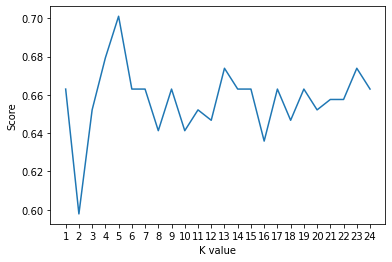

KNN Score Max 70.11%


In [20]:
scoreList = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,25), scoreList)
plt.xticks(np.arange(1,25,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print("KNN Score Max {:.2f}%".format((max(scoreList))*100))

# Obtained Data
KNN_data = max(scoreList)*100
KNN_df = pd.DataFrame({'K': range(1,25), 'Score': scoreList})

In [21]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55 22]
 [33 74]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        77
           1       0.77      0.69      0.73       107

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



### Random Forest 🎲
Random Forest is a supervised machine learning algorithm that performs both classification and regression. It is a meta-algorithm that can be used to train several decision trees at once. It is a form of ensemble learning that handles a large number of decision trees at once, while giving a higher degree of accuracy, and is computationally efficient.

In [22]:
# random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state = 1) 
rf.fit(X_train, y_train)

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    y_pred = rf.predict(X_test)
    predict = rf.predict(df_v3)
    print('Predicted values of original Dataset')
    print(y_pred[0:15])
    print()
    print('Predicted values of other Dataset')
    print(predict[0:15])
    print()

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Predicted values of original Dataset
[0 1 1 1 0 1 1 0 1 1 0 0 1 0 1]

Predicted values of other Dataset
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

Random Forest Algorithm Accuracy Score : 89.13%


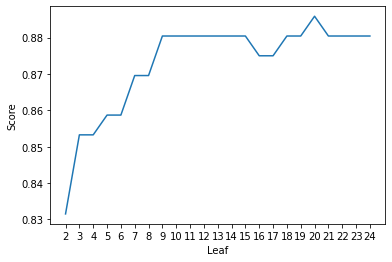

RF Score Max 88.59%


In [23]:
scoreListRF = []
for i in range(2,25):
    rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf2.fit(X_train, y_train)
    scoreListRF.append(rf2.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print("RF Score Max {:.2f}%".format((max(scoreListRF))*100))

# Obtained Data
RF_data = max(scoreListRF)*100
RF_df = pd.DataFrame({'Leaf': range(2,25), 'Score': scoreListRF})

In [24]:
# Model Evaluation
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  9]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### Decision Tree 🌲
Decision Tree are extremely useful for data analytics and machine learning commonly because they break down complex data into more manageable parts. It clearly lays out the problem so that all options can be challenged, allowing us to analyze the possible consequences of a decision. 

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    y_pred = dtc.predict(X_test)
    predict = dtc.predict(df_v3)
    print('Predicted values of original Dataset')
    print(y_pred[0:15])
    print()
    print('Predicted values of other Dataset')
    print(predict[0:15])
    print()
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Predicted values of original Dataset
[0 1 1 1 0 1 1 0 1 1 1 0 1 0 0]

Predicted values of other Dataset
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Decision Tree Test Accuracy 78.80%


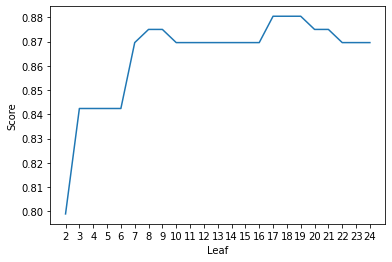

DT Score Max 88.04%


In [26]:
scoreListDT = []
for i in range(2,25):
    dtc2 = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc2.fit(X_train, y_train)
    scoreListDT.append(dtc2.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListDT)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")  
plt.ylabel("Score")
plt.show()
print("DT Score Max {:.2f}%".format((max(scoreListDT))*100))

# Obtained Data
DT_data = max(scoreListDT)*100
DT_df= pd.DataFrame({'Leaf': range(2,25), 'Score': scoreListDT})

In [27]:
# Model Evaluation
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65 12]
 [27 80]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.75      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



### Logistic Regression 🚀
Logistic Regression is a statistical model used for classification. It is a supervised learning algorithm that works by estimating the parameters of a logistic function, which is the probability that an instance belongs to a particular class.

It is commonly used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. This type of analysis can help us predict the likelihood of an event happening or a choice being made.

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train) 


with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    y_pred = logreg.predict(X_test)
    predict = logreg.predict(df_v3)
    print('Predicted values of original Dataset')
    print(y_pred[0:15])
    print()
    print('Predicted values of other Dataset')
    print(predict[0:15])
    print()
print("Logistic Regression Test Accuracy {:.2f}%".format(logreg.score(X_test, y_test)*100))

Predicted values of original Dataset
[0 0 1 1 0 1 1 0 0 1 0 0 1 0 1]

Predicted values of other Dataset
[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0]

Logistic Regression Test Accuracy 84.24%


C:\Users\angel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


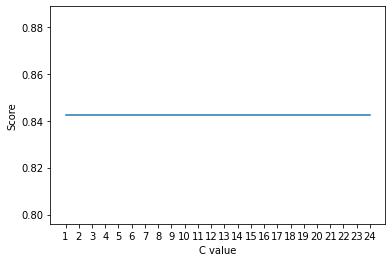

LR Score Max 84.24%


In [29]:
scoreListLR = []
for i in range(1,25):
    logreg2 = LogisticRegression(solver='lbfgs',max_iter=1000, C=i)
    logreg2.fit(X_train, y_train)
    scoreListLR.append(logreg2.score(X_test, y_test))
       
plt.plot(range(1,25), scoreListLR)
plt.xticks(np.arange(1,25,1))
plt.xlabel("C value")
plt.ylabel("Score")
plt.show()
print("LR Score Max {:.2f}%".format((max(scoreListLR))*100))
 
# Obtained Data
LR_data = max(scoreListLR)*100
LR_df = pd.DataFrame({'C value': range(1,25), 'Score': scoreListLR})

In [30]:
# Model Evaluation
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 

[[68  9]
 [20 87]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



### Gaussian NB 📉
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values and it's also assumed that all the features are following a gaussian distribution i.e, normal distribution. 

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    y_pred = gnb.predict(X_test)
    predict = gnb.predict(df_v3)
    print('Predicted values of original Dataset')
    print(y_pred[0:15])
    print()
    print('Predicted values of other Dataset')
    print(predict[0:15])
    print()
print("Gaussian Naive Bayes Test Accuracy {:.2f}%".format(gnb.score(X_test, y_test)*100))

Predicted values of original Dataset
[0 1 1 1 0 1 1 0 1 1 0 0 0 0 1]

Predicted values of other Dataset
[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]

Gaussian Naive Bayes Test Accuracy 84.24%


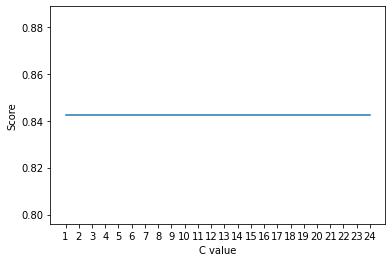

NB Score Max 84.24%


In [32]:
scoreListNB = []
for i in range(1,25):
    gnb2 = GaussianNB()
    gnb2.fit(X_train, y_train)
    scoreListNB.append(gnb2.score(X_test, y_test))
     
plt.plot(range(1,25), scoreListNB)
plt.xticks(np.arange(1,25,1)) 
plt.xlabel("C value")
plt.ylabel("Score")
plt.show()
print("NB Score Max {:.2f}%".format((max(scoreListNB))*100))
 
# Obtained Data
NB_data = max(scoreListNB)*100
NB_df = pd.DataFrame({'C value': range(1,25), 'Score': scoreListNB})

## Model Comparison 🔬
And lastly, we will compare the different models to find the best model.

In [33]:
comparison = pd.DataFrame({'Model': ["Logistic Regression", "KNN",  "Decision Tree", "Random Forest", 'Gaussian NB'], 
                        'Accuracy': [LR_data, KNN_data, DT_data, RF_data, NB_data]})

comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,88.586957
2,Decision Tree,88.043478
0,Logistic Regression,84.239130
4,Gaussian NB,84.239130
1,KNN,70.108696


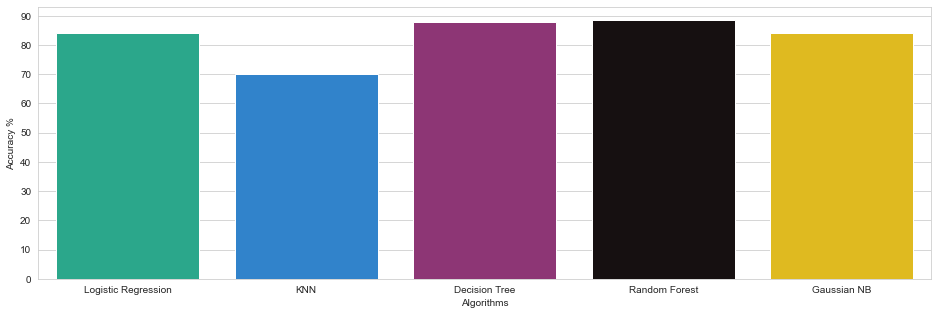

In [34]:
methods = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", 'Gaussian NB']
accuracy = [LR_data, KNN_data, DT_data, RF_data, NB_data]
colors = ["#16bc96", "#1885e4", "#9B287B","#170F11", "#FFCD00"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

## Output 📥
We will now write the result in a csv file.

In [35]:
# output result to csv file
comparison.to_csv('comparison.csv', index=False)

# head of the csv file
comparison.head()

,Model,Accuracy
0,Logistic Regression,84.239130
1,KNN,70.108696
2,Decision Tree,88.043478
3,Random Forest,88.586957
4,Gaussian NB,84.239130


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A dictionary of models we used
models = {'rf': rf, 'knn': knn, 'dt': dtc, 'lr': logreg, 'gnb': gnb}

# Selecting the best model based on accuracy 
best_model = max(models, key=lambda x: models[x].score(X_test, y_test))

# Using the best prediction model to predict the test set
def predict_model_answer(test):    
    return models[best_model].predict(test)
    

In [37]:
warnings.filterwarnings("ignore")

# making a prediction 
df_v3 = pd.read_csv('heart.csv')
df_v3 = df_v3.drop('target', axis=1) # Heart disease
df_v3 = df_v3.drop('ca', axis=1)
df_v3 = df_v3.drop('thal', axis=1)
 
# predicting the answer
predict = predict_model_answer(df_v3)

# attaching the column to the dataframe
df_v3['prediction'] = predict
df_v3.to_csv('heart_prediction.csv', index=False)

In [38]:
warnings.filterwarnings("ignore")

# predicting the answer
predict = predict_model_answer(X_test)

# attaching the column to the dataframe
X_test['prediction'] = predict
X_test.to_csv('heart_prediction_test.csv', index=False)

In [39]:
df_v3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,prediction
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [40]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,prediction
668,63,0,1,140,195,0,1,179,0,0.0,2,0
30,53,1,2,145,518,0,1,130,0,0.0,1,1
377,65,1,0,160,0,1,2,122,0,1.2,1,1
535,56,1,0,130,0,0,0,122,1,1.0,1,1
807,54,1,1,108,309,0,1,156,0,0.0,2,0
